## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 25 (delta 2), reused 1 (delta 1), pack-reused 21
Receiving objects: 100% (25/25), 5.04 MiB | 12.18 MiB/s, done.
Resolving deltas: 100% (4/4), done.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/kmc/data/airbnb_hw.csv")

In [22]:
df.describe()

,Host Id,Review Scores Rating (bin),Zipcode,Beds,Number of Records,Number Of Reviews,Review Scores Rating,price,beds,n_reviews,rating
count,3.047800e+04,22155.000000,30344.000000,30393.000000,30478.0,30478.000000,22155.000000,30478.000000,30393.000000,30478.000000,22155.000000
mean,1.273171e+07,90.738659,10584.854831,1.530089,1.0,12.018735,91.993230,163.589737,1.530089,12.018735,91.993230
std,1.190270e+07,9.059519,921.299397,1.015359,0.0,21.980703,8.850373,197.785454,1.015359,21.980703,8.850373
min,5.000000e+02,20.000000,1003.000000,0.000000,1.0,0.000000,20.000000,10.000000,0.000000,0.000000,20.000000
25%,2.701298e+06,85.000000,10017.000000,1.000000,1.0,0.000000,89.000000,80.000000,1.000000,0.000000,89.000000
50%,8.551693e+06,90.000000,10065.000000,1.000000,1.0,3.000000,94.000000,125.000000,1.000000,3.000000,94.000000
75%,2.120617e+07,100.000000,11216.000000,2.000000,1.0,13.000000,100.000000,195.000000,2.000000,13.000000,100.000000
max,4.303307e+07,100.000000,99135.000000,16.000000,1.0,257.000000,100.000000,10000.000000,16.000000,257.000000,100.000000


In [ ]:
#1 - clean Price, Beds, Number of Reviews, Review Scores Rating

In [10]:
#create new columns to be cleaned with shorter names
df["price"]=df["Price"]
df["beds"]=df["Beds"]
df['n_reviews'] = df['Number Of Reviews']
df["rating"] = df["Review Scores Rating"]

<Axes: >

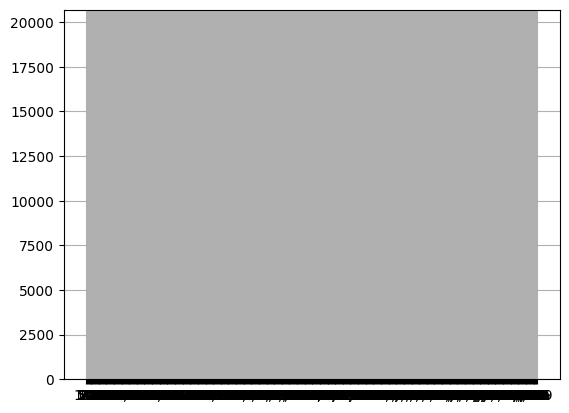

In [11]:
var = "price"

df[var].hist()
# price is not a integer, so have to coerce

In [13]:
df["price"] = df["price"].str.replace(",","")

In [14]:
df["price"] = pd.to_numeric(df["price"],errors = 'coerce')

In [23]:
var = "beds"

df[var].describe()
# missing some values


count    30393.000000
mean         1.530089
std          1.015359
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: beds, dtype: float64

In [31]:
df["beds"]=df["Beds"]

In [32]:
df["beds"].value_counts()
# by far most of the data points are clustered around 1, so replace nans with 1

df["beds"]=df["beds"].fillna(1)

In [24]:
var = "n_reviews"

df[var].describe()
# no missing values, already a number

count    30478.000000
mean        12.018735
std         21.980703
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        257.000000
Name: n_reviews, dtype: float64

In [25]:
var = "rating"

df[var].describe()
# missing a ton of values

count    22155.000000
mean        91.993230
std          8.850373
min         20.000000
25%         89.000000
50%         94.000000
75%        100.000000
max        100.000000
Name: rating, dtype: float64

<Axes: >

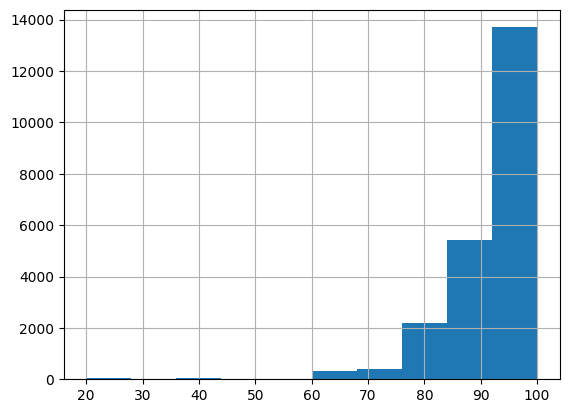

In [33]:
df[var].hist()

In [34]:
# check to see if rating is null because there are no reviews

pd.crosstab(df['rating'].isnull(), df['n_reviews']>0)

n_reviews,False,True
rating,,
False,0,22155
True,7814,509


In [35]:
# since most nans in ratings come from having no reviews, going to go ahead and drop all of those values because
# they don't really mean anything


In [40]:
# make new df with only relevant clean data

airbnb = df.loc[:,['price','beds','rating','n_reviews']]


In [41]:
airbnb.head()
airbnb.describe()

,price,beds,rating,n_reviews
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,91.993230,16.505439
std,148.836621,1.043273,8.850373,24.308241
min,10.000000,0.000000,20.000000,1.000000
25%,85.000000,1.000000,89.000000,2.000000
50%,125.000000,1.000000,94.000000,7.000000
75%,190.000000,2.000000,100.000000,20.000000
max,10000.000000,16.000000,100.000000,257.000000


In [ ]:
#2

#drop nas
airbnb = airbnb.dropna()

In [42]:
# import kmeans and get maxmin function from class notes

from sklearn.cluster import KMeans # Import kmc

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x


In [44]:
# seperate price

price = airbnb.drop("price",axis = 1)

In [46]:
price = price.apply(maxmin) #normalize

In [49]:
#create model

#initial_centroids = np.random.randint(low=1,high=24,size=3)
model = KMeans(n_clusters=6, max_iter=2, n_init = 10,  random_state=0)
model = model.fit(price)
#gdf['g_hat'] = model.predict(X)

In [50]:
#3
#create pairplot
price['cluster'] = model.labels_

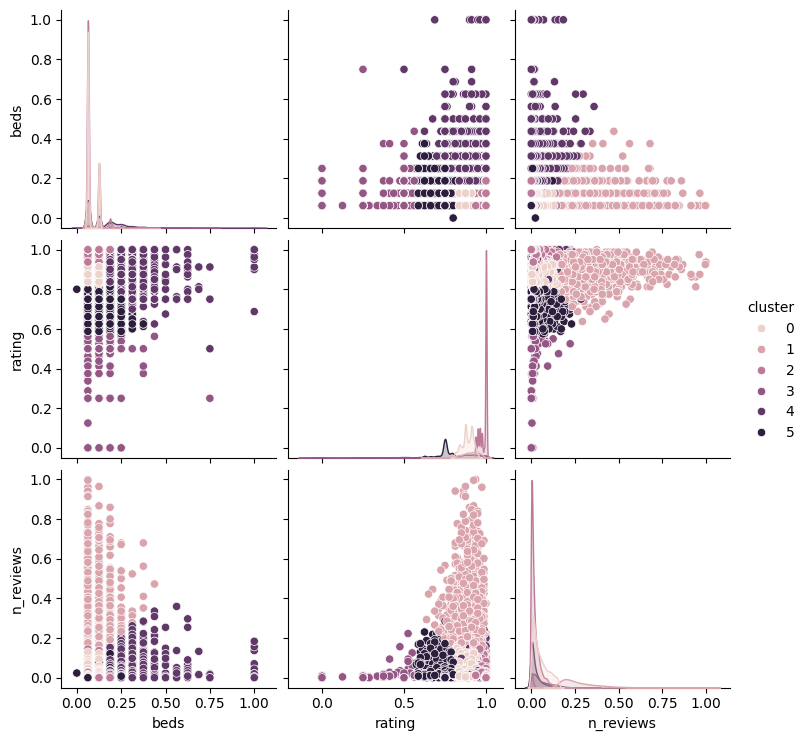

In [51]:
sns.pairplot(data=price,hue = "cluster")
# how clustering is carried out in multiple dimensions

In [59]:
#5
airbnb["cluster"]=model.labels_



In [60]:
airbnb.loc[:,["price","cluster"]].groupby("cluster").describe()

price                                                            
          count        mean         std   min    25%    50%    75%      max
cluster                                                                    
0        6686.0  136.982949  144.559931  22.0   80.0  120.0  175.0  10000.0
1        2313.0  136.592304   79.694021  27.0   85.0  120.0  170.0    875.0
2        8367.0  153.943229  117.548741  10.0   85.0  130.0  195.0   3500.0
3         407.0  129.533170  255.865812  25.0   60.0   90.0  150.0   5000.0
4        1718.0  291.795693  257.533549  27.0  150.0  225.0  350.0   4500.0
5        2664.0  133.425676  128.112382  20.0   70.0  110.0  169.0   5000.0

In [ ]:
#clusters 3 and 4 have by far the highest mean prices
# cluster 1 is much cheaper than the others

In [61]:
#5 scree plot

k_bar = 10
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=100, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(price) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

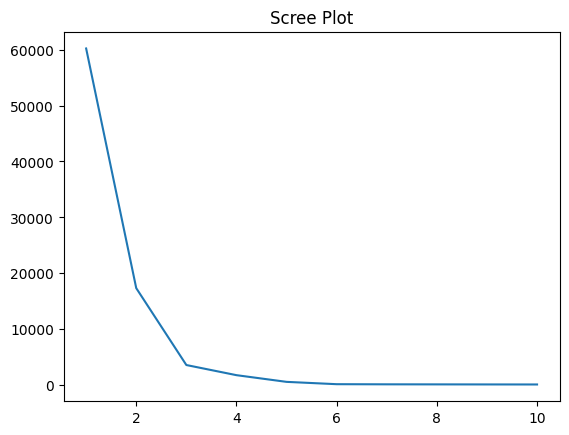

In [62]:
scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

In [ ]:
#based on the scree plot, 3 is the best k for the model
# repeat model with clusters = 3

In [63]:
model = KMeans(n_clusters=3, max_iter=2, n_init = 10,  random_state=0)
model = model.fit(price)

In [64]:
#pairplot
price['cluster'] = model.labels_

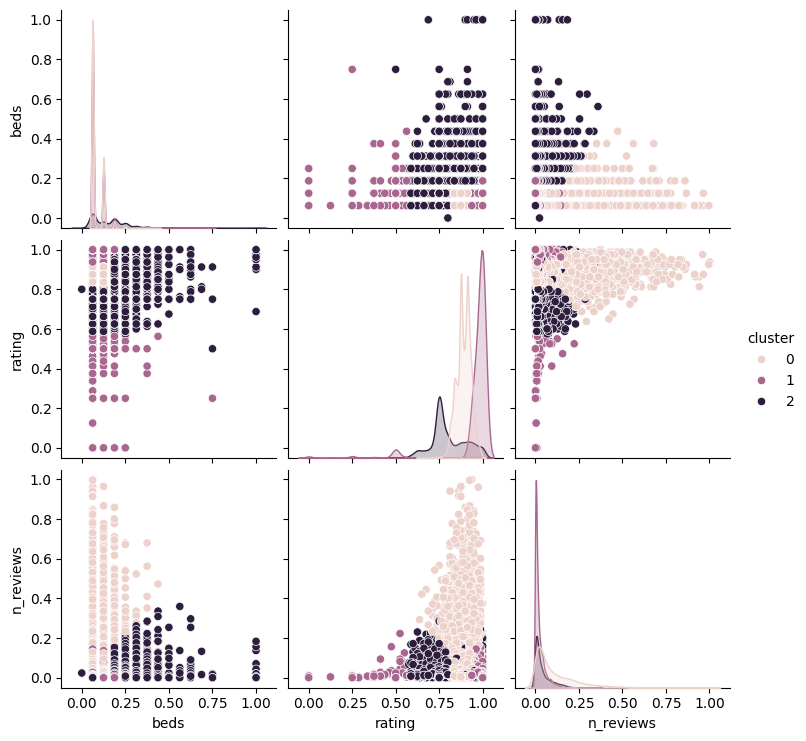

In [65]:
sns.pairplot(data=price,hue = "cluster")

In [66]:
airbnb["cluster"]=model.labels_

airbnb.loc[:,["price","cluster"]].groupby("cluster").describe()

price                                                           
          count        mean         std   min   25%    50%    75%      max
cluster                                                                   
0        8999.0  136.882543  130.987144  22.0  81.0  120.0  175.0  10000.0
1        8774.0  152.810919  127.407813  10.0  85.0  130.0  195.0   5000.0
2        4382.0  195.515974  204.815623  20.0  90.0  150.0  239.0   5000.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?